In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import random
import re
import shutil
from collections import defaultdict
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [48]:
dir = r"Directorio de entrada"
os.listdir(dir)

['Clasificación_glioma',
 'G_II',
 'G_III',
 'G_III_cropped',
 'G_II_cropped',
 'G_IV',
 'G_IV_cropped',
 'II',
 'III',
 'IV',
 'Selected_II',
 'Selected_III',
 'Selected_IV',
 'sin_cropping',
 'test',
 'train',
 'val']

In [49]:
train_path = dir + '/train/'
test_path = dir + '/test/'
validation_path = dir + '/val/'
print("train path:", train_path)
print("test path:", test_path)
print("validation path:", validation_path)

train path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\Glioma_clasificación/train/
test path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\Glioma_clasificación/test/
validation path: C:\Users\alvar\Desktop\Bioinfor y Bioest\TFM\Rembrand\Glioma_clasificación/val/


In [4]:
os.listdir(test_path)

['G_III_cropped', 'G_II_cropped', 'G_IV_cropped']

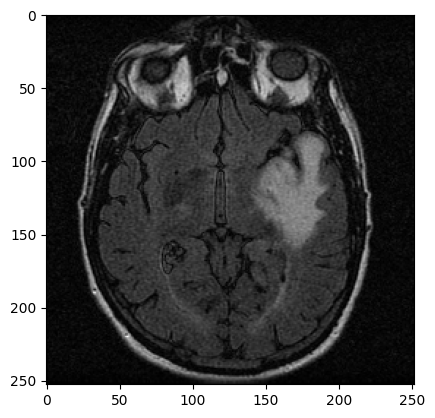

In [8]:
plt.imshow(plt.imread(train_path + 'G_II_cropped/' + '1-22_39.png'))

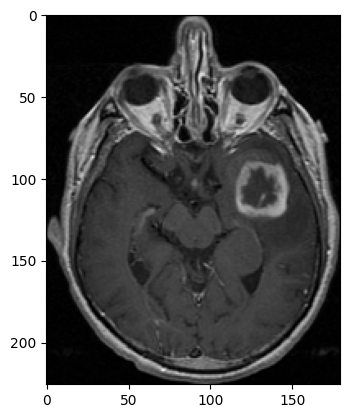

In [6]:
plt.imshow(plt.imread(train_path + 'G_III_cropped/' + '1-23_42.png'))

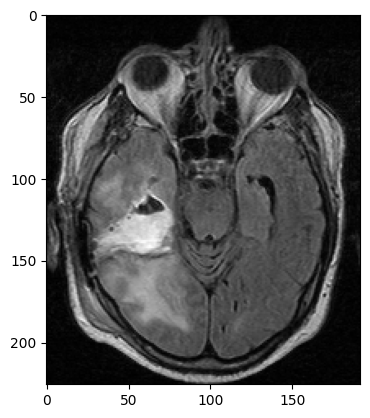

In [7]:
plt.imshow(plt.imread(train_path + 'G_IV_cropped/' + '1-13_239.png'))

In [50]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True)

In [11]:
image_generator.flow_from_directory(train_path)

Found 660 images belonging to 3 classes.


In [12]:
image_generator.flow_from_directory(test_path)

Found 278 images belonging to 3 classes.


In [13]:
image_generator.flow_from_directory(validation_path)

Found 164 images belonging to 3 classes.


In [ ]:
## Modelo VGG19

In [51]:
Eff_model = EfficientNetB1(
                    include_top=False,
                    weights='imagenet',
                    input_shape=(240,240,3),
                    pooling='max',
                    classes= 3
                )

for layer in model_eff.layers:
    layer.trainable = False

In [52]:
model = Sequential([
    Eff_model,
    Dense(2560,activation='relu'),
    BatchNormalization(),
    Dense(1280, activation='relu'),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(3, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 dense_12 (Dense)            (None, 2560)              3279360   
                                                                 
 batch_normalization_6 (Batc  (None, 2560)             10240     
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 1280)              3278080   
                                                                 
 batch_normalization_7 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 1024)             

In [54]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=5e-04) ,loss = 'categorical_crossentropy',metrics = 'accuracy')

In [55]:
batch_size = 64

In [56]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 660 images belonging to 3 classes.


In [57]:
validation_image_generator = image_generator.flow_from_directory(validation_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical')

Found 164 images belonging to 3 classes.


In [58]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=(240, 240),
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='categorical',
                                                            shuffle = False)

Found 278 images belonging to 3 classes.


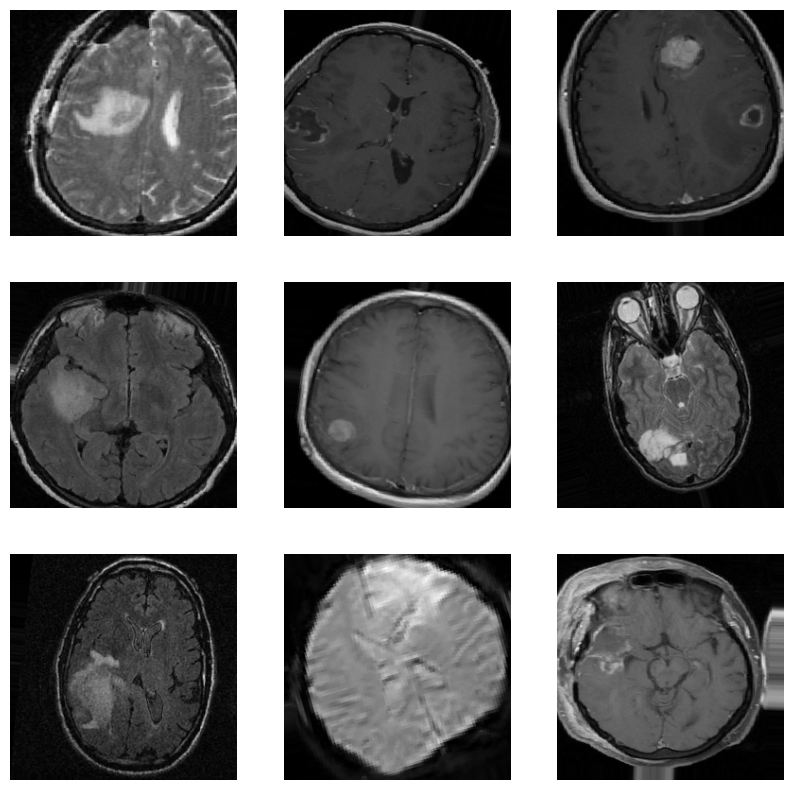

In [13]:
sample_batch = next(train_image_generator)
images, labels = sample_batch

# Mostrar 9 imágenes del lote
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8")) 
    plt.axis('off')
plt.show()

In [23]:
print(test_image_generator.class_indices)  # Verifica las clases

{'G_III_cropped': 0, 'G_II_cropped': 1, 'G_IV_cropped': 2}


In [59]:
history = model.fit(train_image_generator, validation_data=validation_image_generator, epochs=15)

Epoch 1/15
11/11 [==============================] - 86s 6s/step - loss: 1.4493 - accuracy: 0.4833 - val_loss: 5.3900 - val_accuracy: 0.4085
Epoch 2/15
11/11 [==============================] - 66s 6s/step - loss: 1.1559 - accuracy: 0.6106 - val_loss: 4.2479 - val_accuracy: 0.2927
Epoch 3/15
11/11 [==============================] - 65s 6s/step - loss: 0.9507 - accuracy: 0.7030 - val_loss: 2.4921 - val_accuracy: 0.4451
Epoch 4/15
11/11 [==============================] - 66s 6s/step - loss: 0.6839 - accuracy: 0.7242 - val_loss: 1.5241 - val_accuracy: 0.5488
Epoch 5/15
11/11 [==============================] - 67s 6s/step - loss: 0.4887 - accuracy: 0.8258 - val_loss: 3.4364 - val_accuracy: 0.4024
Epoch 6/15
11/11 [==============================] - 65s 6s/step - loss: 0.4792 - accuracy: 0.8242 - val_loss: 1.3767 - val_accuracy: 0.6280
Epoch 7/15
11/11 [==============================] - 66s 6s/step - loss: 0.3652 - accuracy: 0.8561 - val_loss: 1.1243 - val_accuracy: 0.6341
Epoch 8/15
11/11 [==

In [30]:
Metricas para el modelo con learning rate 5e-05 y 16 epocas

SyntaxError: invalid syntax (867844950.py, line 1)

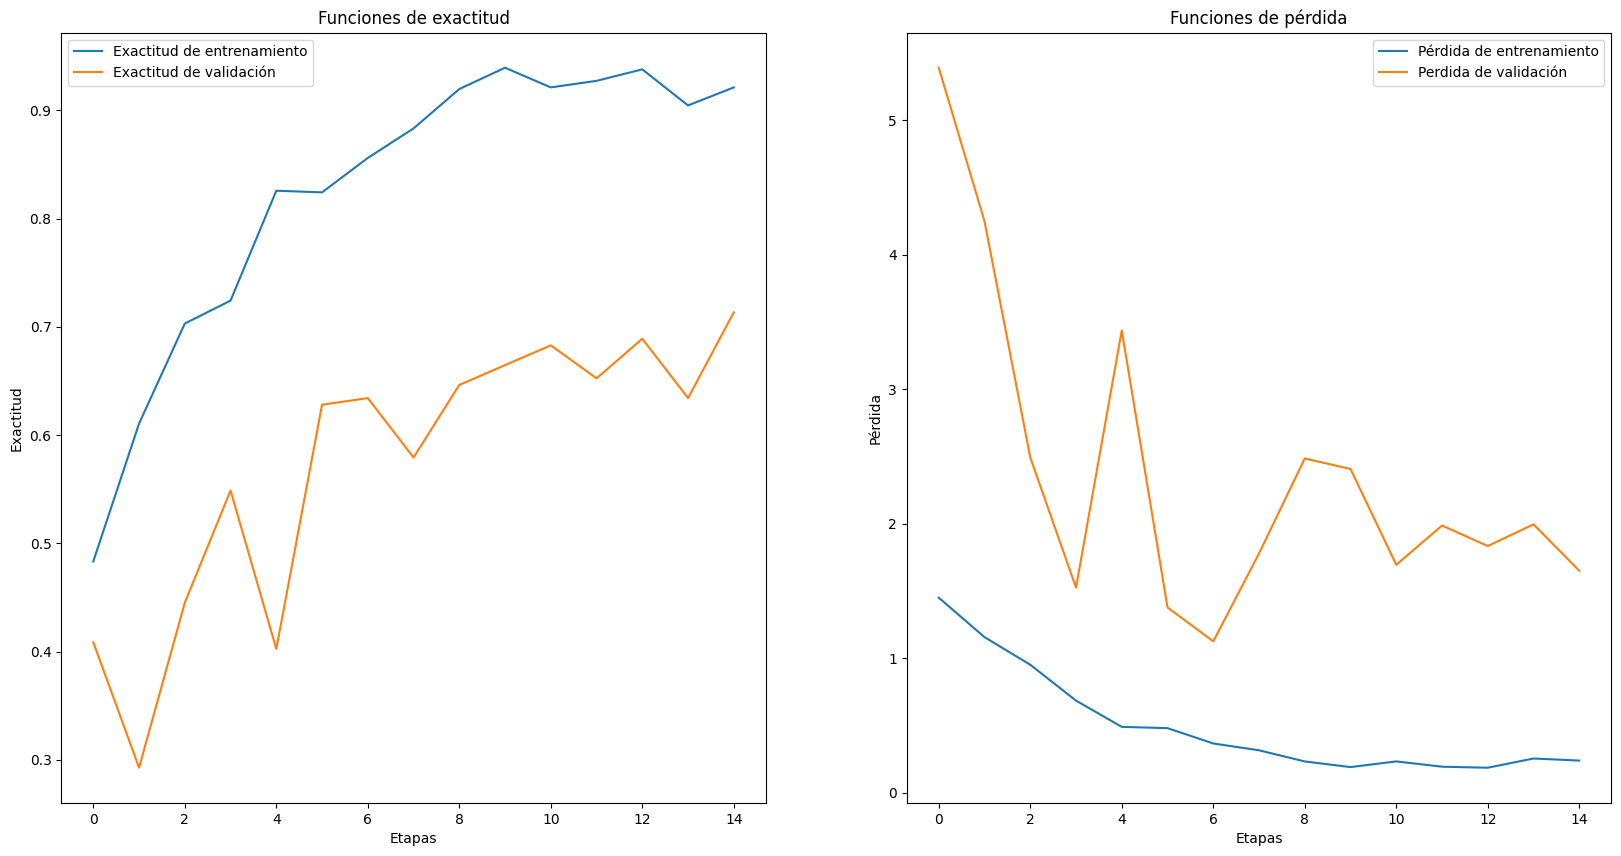

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))

ax[0].plot(acc, label = 'Exactitud de entrenamiento')
ax[0].plot(val_acc, label = 'Exactitud de validación')
ax[0].set_xlabel('Etapas')
ax[0].set_ylabel('Exactitud')
ax[0].set_title('Funciones de exactitud')
ax[0].legend()


ax[1].plot(loss, label = 'Pérdida de entrenamiento')
ax[1].plot(val_loss, label = 'Perdida de validación')
ax[1].set_xlabel('Etapas')
ax[1].set_ylabel('Pérdida')
ax[1].set_title('Funciones de pérdida')
ax[1].legend()

In [61]:
y_pred_probs_1 = model.predict(test_image_generator, steps=len(test_image_generator), verbose=1)

y_pred_1 = np.argmax(y_pred_probs_1, axis=1)
print(y_pred_1)
y_true = test_image_generator.classes
print(y_true)

5/5 [==============================] - 8s 921ms/step
[2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 1 0 2 0 1 2 0 0 0 1 2 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 2 2 1 2 0 2 2 2 0 0 2 0 0 2 2 1 0 1
 0 2 1 1 2 0 0 0 0 0 0 1 0 1 0 0 1 0 2 1 2 1 0 0 1 1 2 1 2 1 2 2 1 2 1 1 0
 2 1 1 2 1 1 0 1 1 0 1 2 0 2 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1
 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 2 2 0 2 1 2 2 0 0 0 2 2 2 2 0 0 2 2 2 2 2 0
 2 2 2 2 1 2 2 0 0 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 0 2 2 1 2 0 2 2 2 1 2 2 2 2 0 2 2 0 2 0 2 2 0 2 2 0 2 0 2 2 2 2 2 0
 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 

In [51]:
print(y_pred_probs_1.shape)

(278, 3)


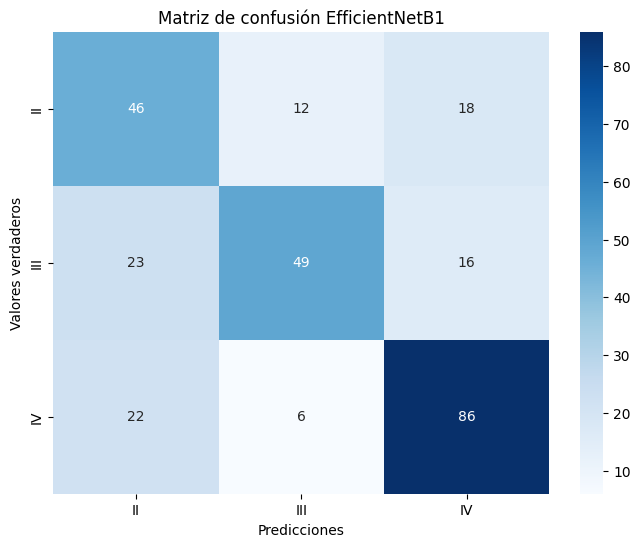

              precision    recall  f1-score   support

          II       0.51      0.61      0.55        76
         III       0.73      0.56      0.63        88
          IV       0.72      0.75      0.74       114

    accuracy                           0.65       278
   macro avg       0.65      0.64      0.64       278
weighted avg       0.66      0.65      0.65       278



In [62]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_1)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["II", "III", "IV"], yticklabels=["II", "III", "IV"])
plt.xlabel("Predicciones")
plt.ylabel("Valores verdaderos")
plt.title("Matriz de confusión EfficientNetB1")
plt.show()

# Imprimir un reporte de clasificación
report = classification_report(y_true, y_pred_1, target_names=["II", "III", "IV"])
print(report)

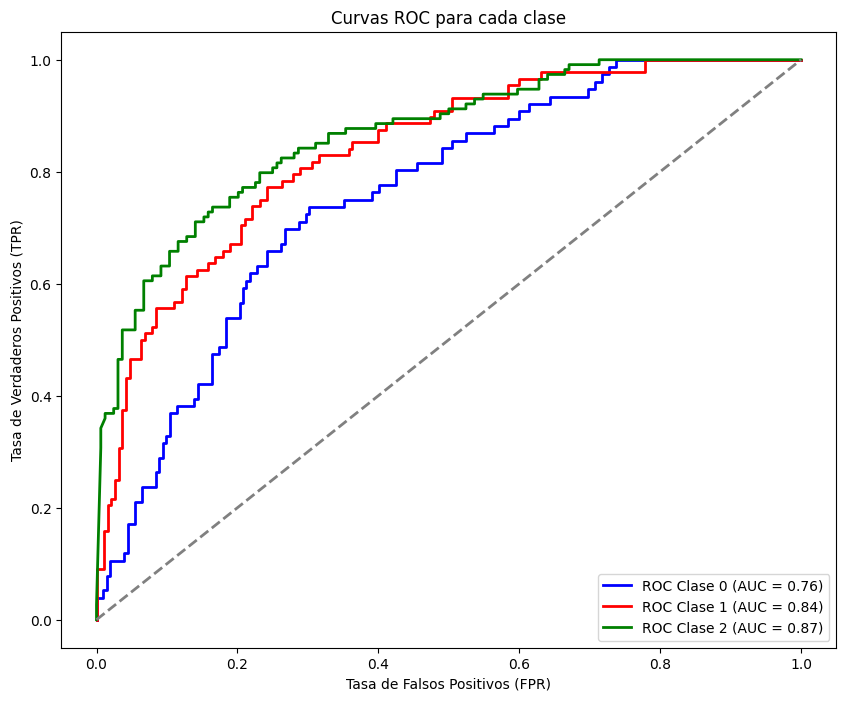

In [63]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarizamos las etiquetas reales (one-hot encoding)
n_classes = 3  # Número de clases
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])


fpr = dict()
tpr = dict()
roc_auc = dict()

# fpr, tpr y AUC 
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC Clase {i} (AUC = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()

In [40]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip uninstall graphviz

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [46]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten



# Generar la representación del modelo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
